In [4]:
from utils import *
from constants import *
import numpy as np
import json
import os, shutil
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [2]:
# opt = parse()

no = "15"    
origin_path = "dataset/origin/valid"
result_path = os.path.join("test_results", no)



sitename: 湖口
(8672, 16) (8672, 1, 1)
[ 1.  4. 16.]
origin  mean ± std: 16.14 ± 21.72
predict mean ± std: 17.63 ± 10.39


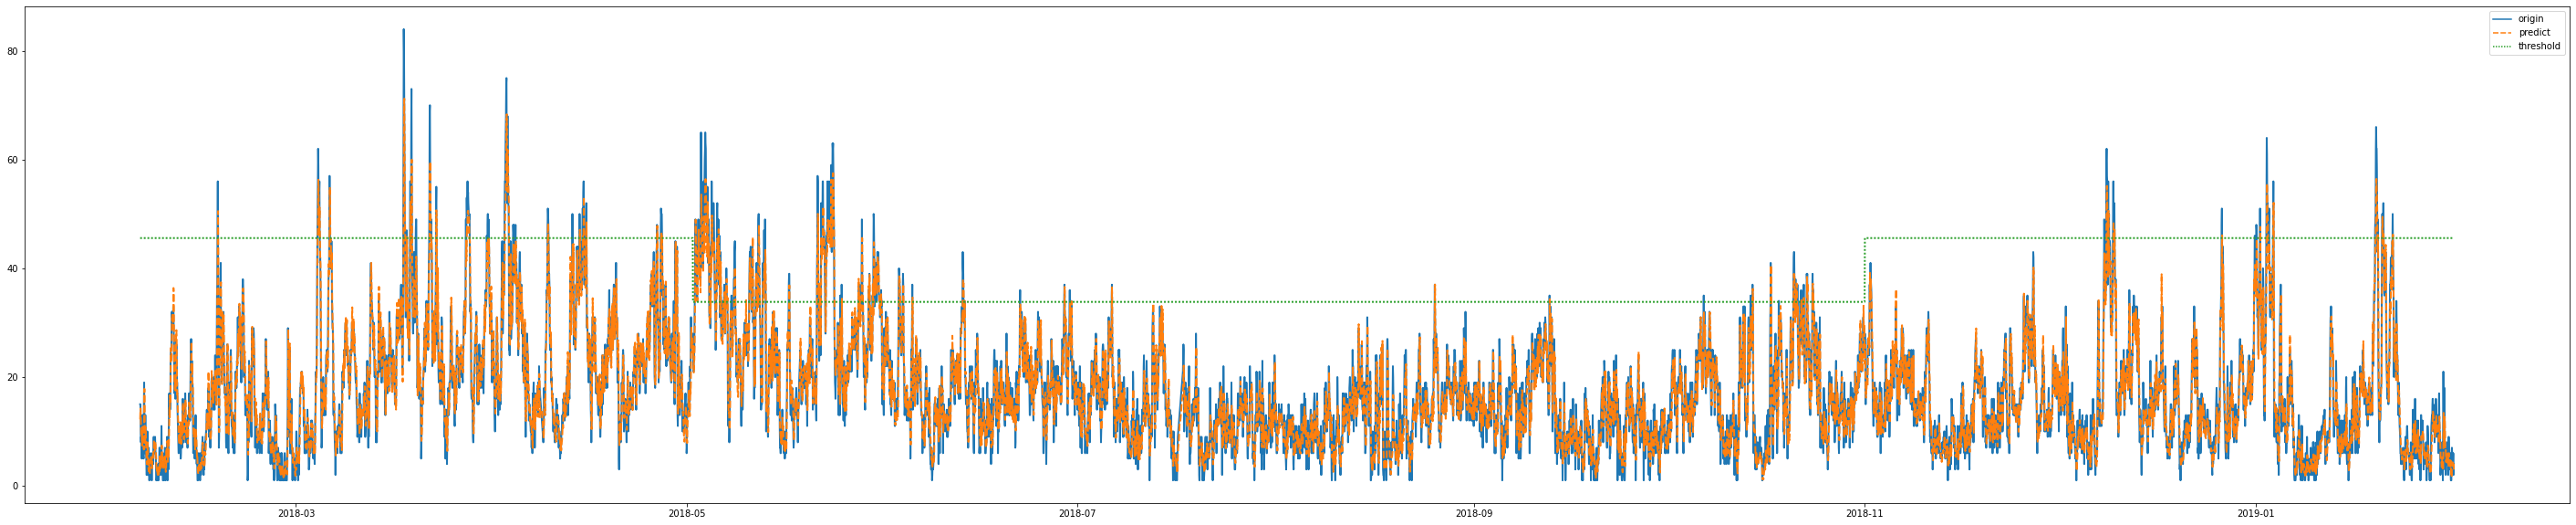

sitename: 林園
(8672, 16) (8672, 1, 1)
[ 1.  4. 16.]
origin  mean ± std: 17.45 ± 24.13
predict mean ± std: 24.07 ± 13.65


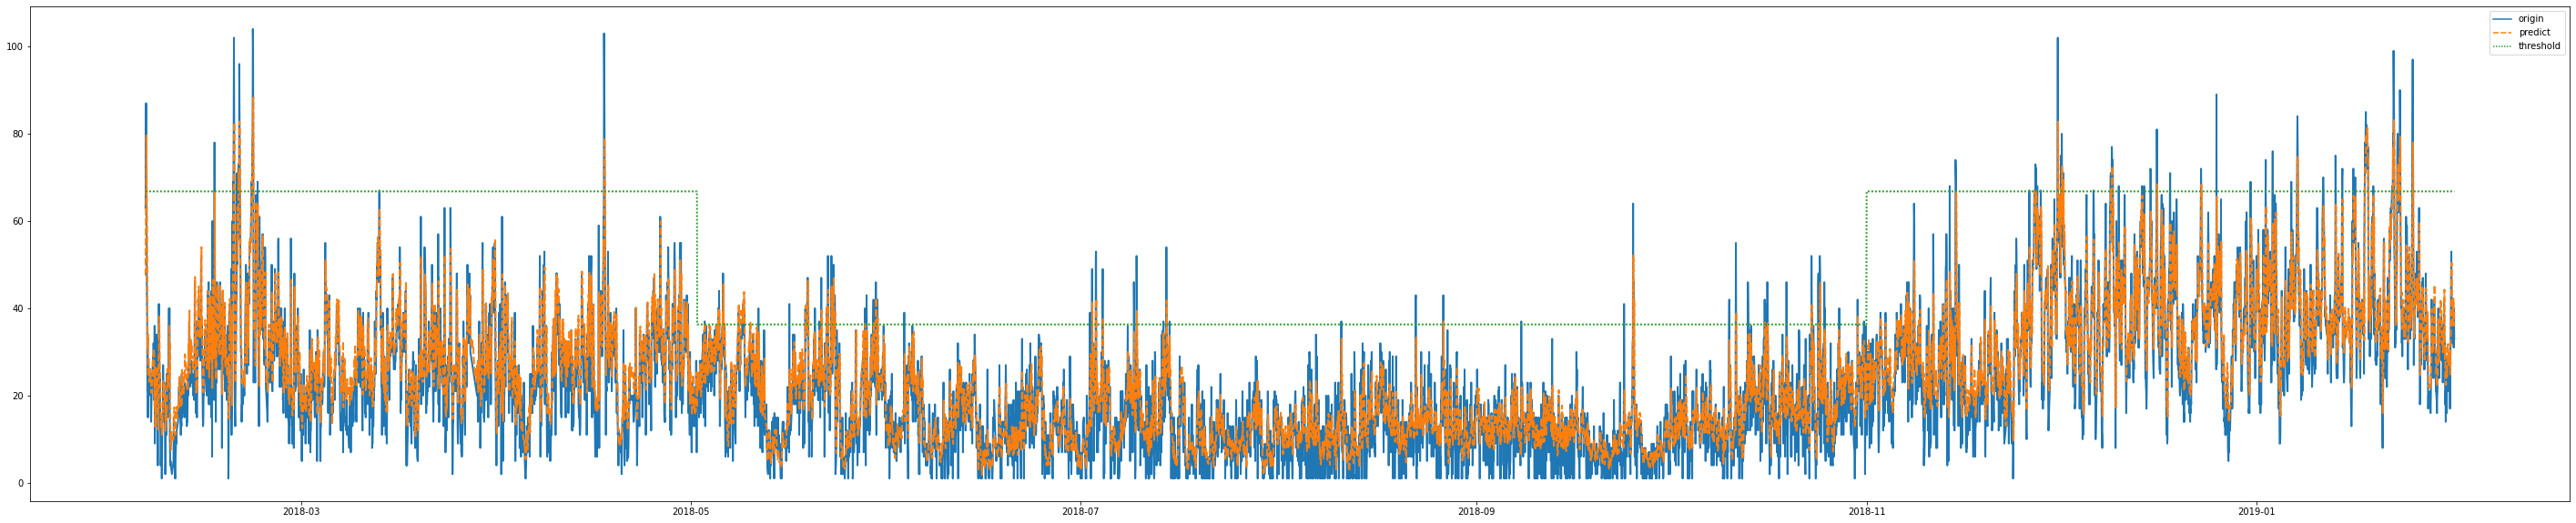

sitename: 南投
(8672, 16) (8672, 1, 1)
[ 1.  4. 16.]
origin  mean ± std: 16.21 ± 21.29
predict mean ± std: 21.64 ± 12.19


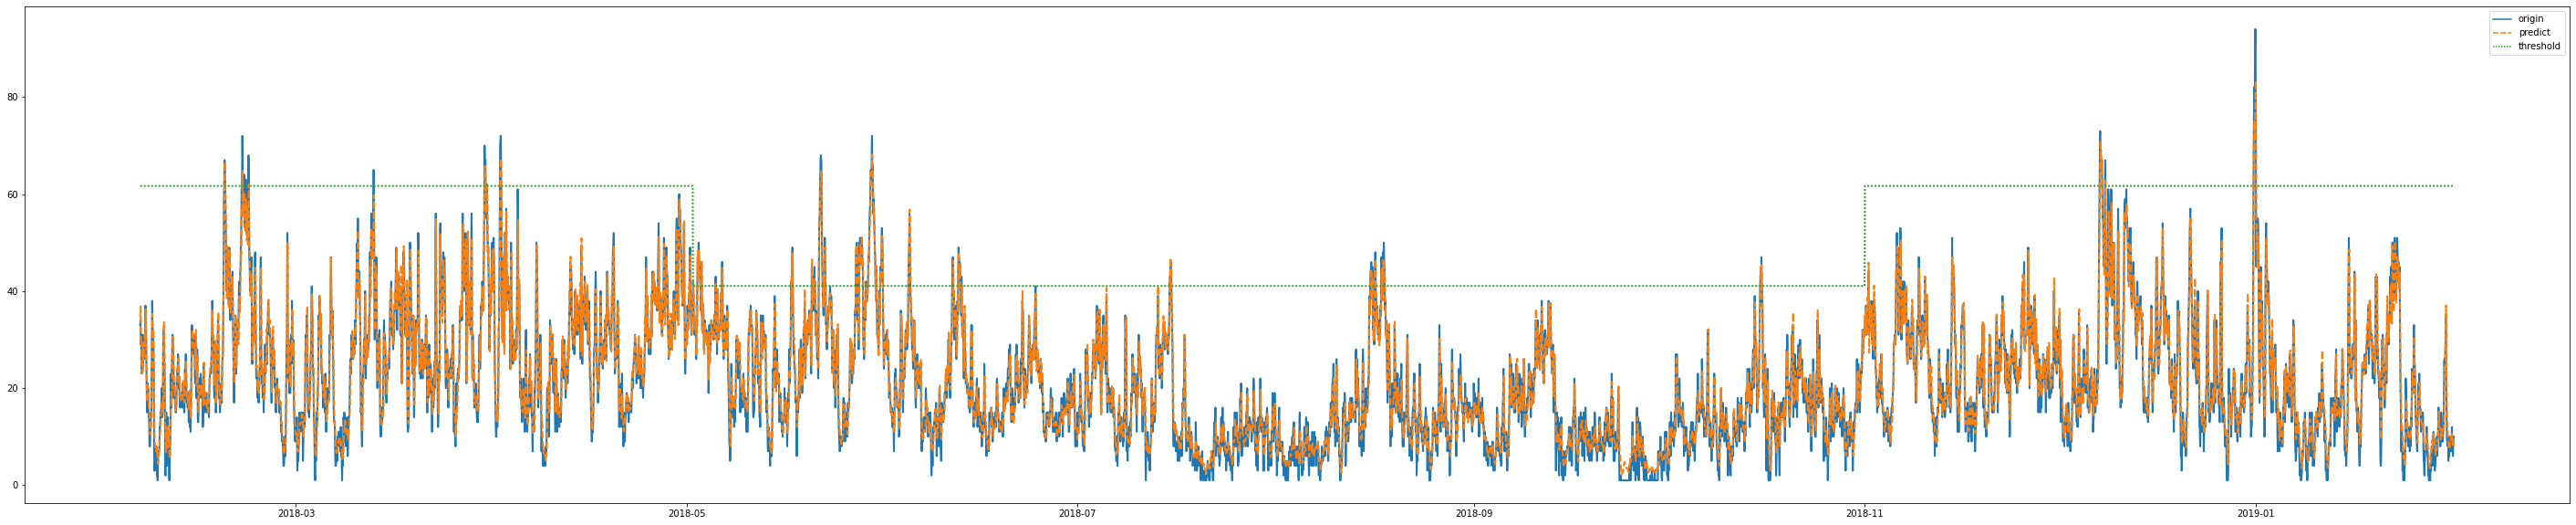

sitename: 士林
(8672, 16) (8672, 1, 1)
[ 1.  4. 16.]
origin  mean ± std: 15.30 ± 20.47
predict mean ± std: 15.70 ± 9.60


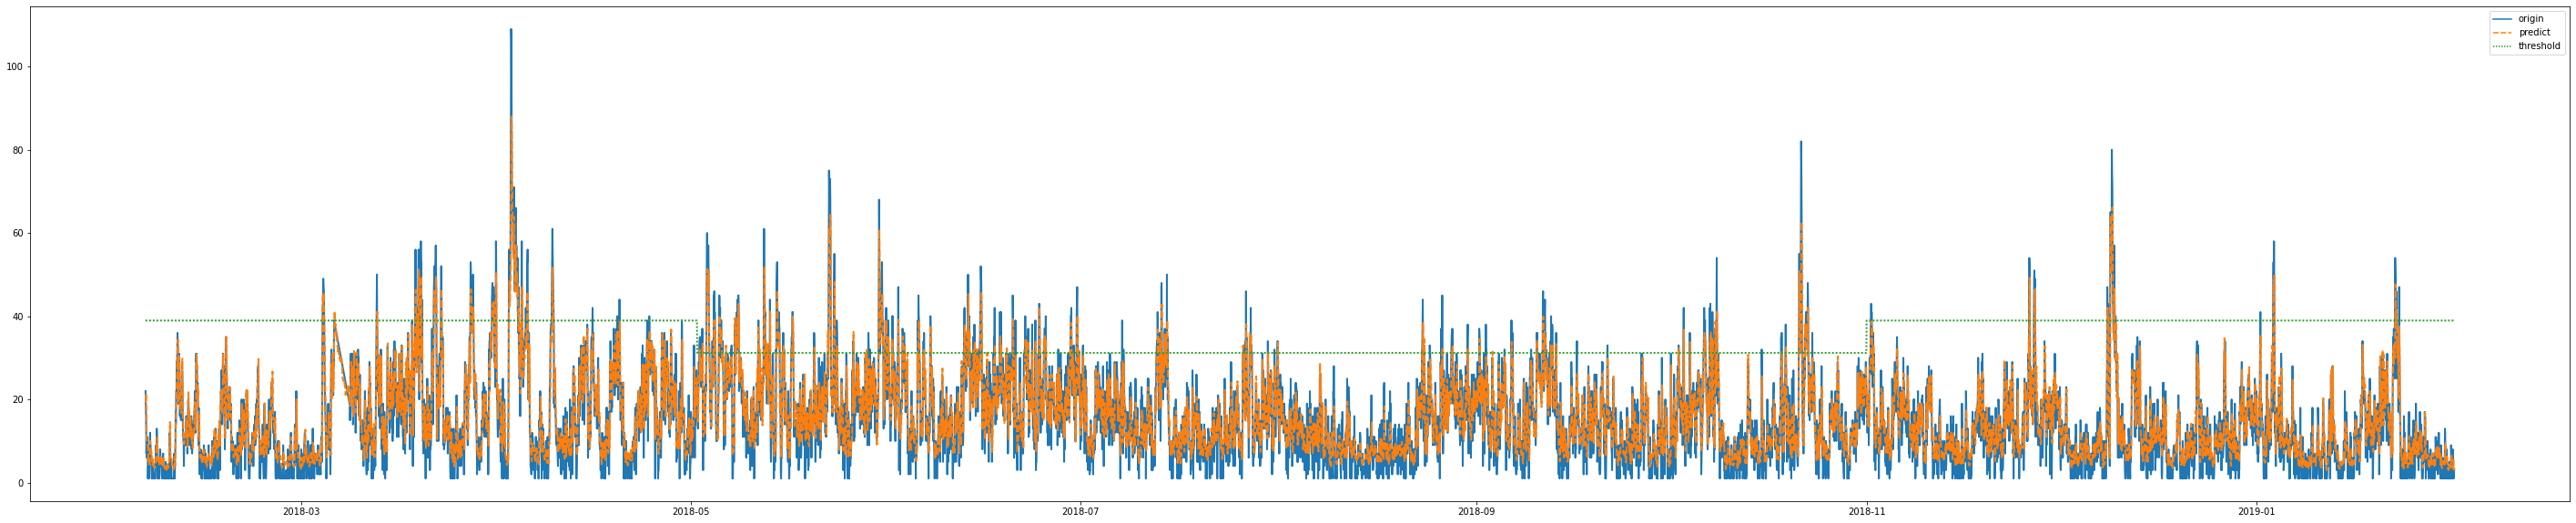

sitename: 埔里
(8672, 16) (8672, 1, 1)
[ 1.  4. 16.]
origin  mean ± std: 15.75 ± 22.05
predict mean ± std: 21.13 ± 9.33


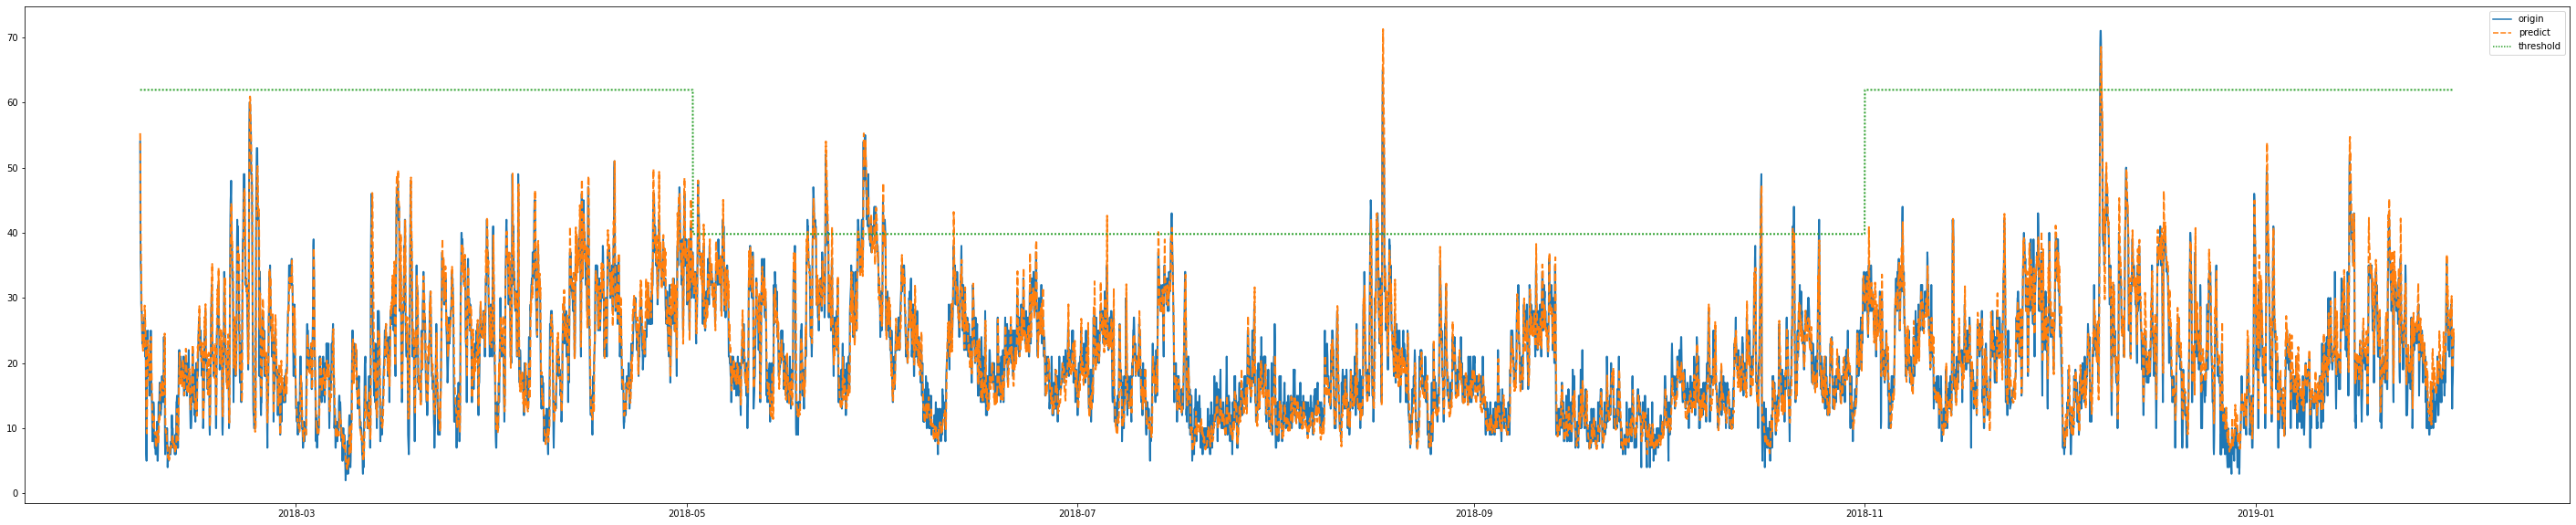

sitename: 關山
(8672, 16) (8672, 1, 1)
[ 1.  4. 16.]
origin  mean ± std: 12.12 ± 20.40
predict mean ± std: 9.33 ± 4.07


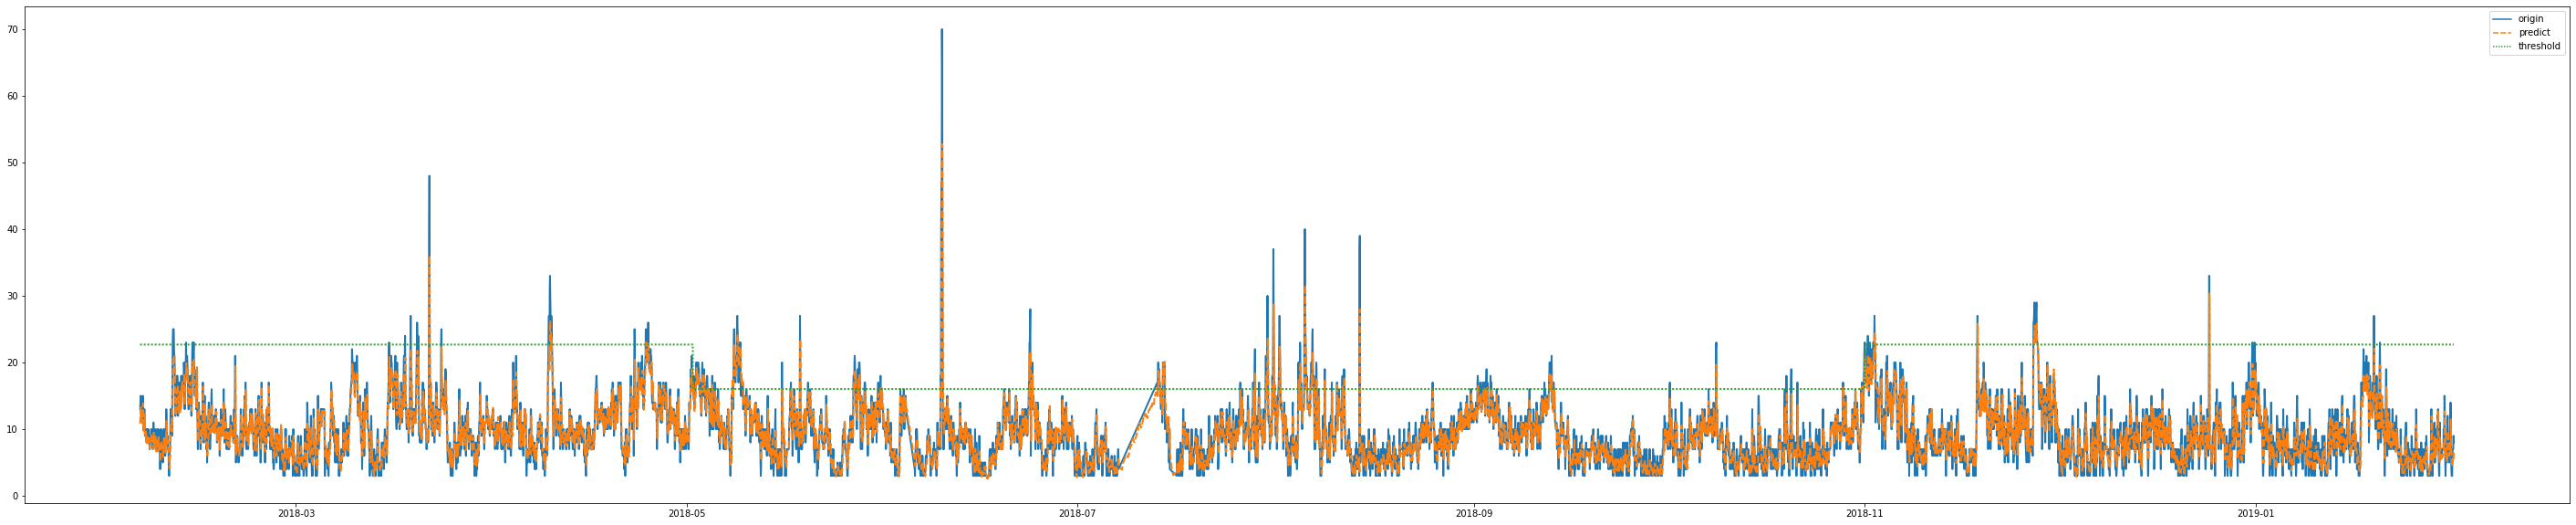

In [15]:

with open("dataset/train_threshold.json", "r") as fp:
    thres_list = json.load(fp)

for sitename in sample_sites:
    print(f"sitename: {sitename}")
    origin_data = np.load(f"{origin_path}/{sitename}.npy")
    predict_data = np.load(f"{result_path}/{sitename}.npy")
    threshold = thres_list[sitename]

    target = 1
    origin_data = origin_data[80+8-1+target:]
#     predict_data = np.expand_dims(predict_data, axis=-1)
    # create thres_data
    thres_data = np.zeros((origin_data.shape[0], 1))
    s_index = np.isin(origin_data[:, -3], [4,5,6,7,8,9])
    w_index = np.isin(origin_data[:, -3], [4,5,6,7,8,9], invert=True)
    thres_data[s_index] = threshold["summer"]
    thres_data[w_index] = threshold["winter"]
    print(origin_data.shape, predict_data.shape)
    print(origin_data[0, -3:])
    print(f"origin  mean ± std: {origin_data.mean():.2f} ± {origin_data.std():.2f}")
    print(f"predict mean ± std: {predict_data.mean():.2f} ± {predict_data.std():.2f}")
    st = 0
    ed = predict_data.shape[0]
    origin_data  = origin_data [st:ed]
    predict_data = predict_data[st:ed]
    thres_data   = thres_data[st:ed]
    y = np.concatenate((origin_data[:, 7:8], predict_data[:, 0], thres_data), axis=-1)
    
    plt.figure(figsize=(50, 10))
    # TODO: the date should be customized
    st_time = f"2018-{int(origin_data[0][-3]+1)}-{int(origin_data[0][-2])} {int(origin_data[0][-1])}:00:00"
    dates = pd.date_range(st_time, periods=predict_data.shape[0], freq="H")
    data = pd.DataFrame(y, dates, columns=["origin", "predict", "threshold"])
    #sn.set_theme(style="whitegrid")
    plot = sn.lineplot(data=data, palette="tab10", linewidth=2, )
#     plot.set_title(f"{sitename}")
#     plot.figure.savefig(f"{save_path}/{sitename}.png")
    plt.show()
    #break
